In [48]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans #extension to the extension
# !pip install biosppy   #extension to the extension
# import biosppy.signals.ecg as ecg #extension to the extension
 

In [60]:
# Input file
filename = 'HeartRate.csv'
df = pd.read_csv(filename, header=None)
M = df.values

t = 0
time = np.linspace(0, (len(M)-1)/2000, len(M)) # No time column for this file
fs = 4000
L = len(time)

# Select channel for testing. channel_select <= channel_number
channel_select = 0
test_input = M[:, channel_select+t]

(0.0, 0.8765)

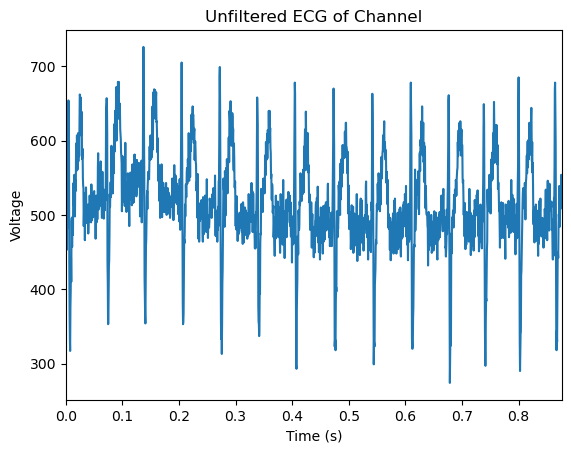

In [61]:
# Plot unfiltered ECG
fig = plt.figure()
plt.plot(time, test_input)
plt.title('Unfiltered ECG of Channel')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.xlim([0, time[-1]])


(0.0, 0.8765)

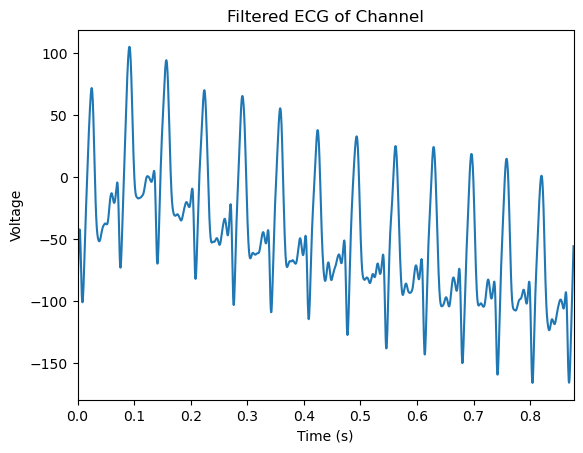

In [62]:
# Filter signal
b, a = signal.butter(2, (0.5, 150), 'bandpass', fs=fs)
filtered_ecg = signal.filtfilt(b, a, test_input)

# Plot filtered ECG
fig = plt.figure()
plt.plot(time, filtered_ecg)
plt.title('Filtered ECG of Channel')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.xlim([0, time[-1]])


Text(0, 0.5, 'Voltage')

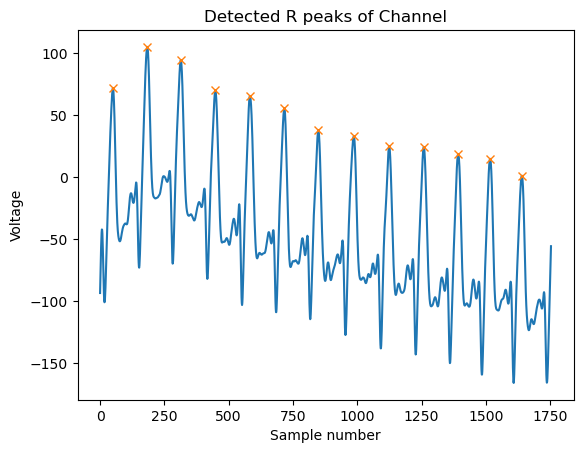

In [63]:
# Detect R peaks
peaks, _ = signal.find_peaks(filtered_ecg, distance=100, prominence=0.8)

# Plot detected R peaks
fig = plt.figure()
plt.plot(filtered_ecg)
plt.plot(peaks, filtered_ecg[peaks], "x")
plt.title('Detected R peaks of Channel')
plt.xlabel('Sample number')
plt.ylabel('Voltage')

Heart rate: 45.28 bpm


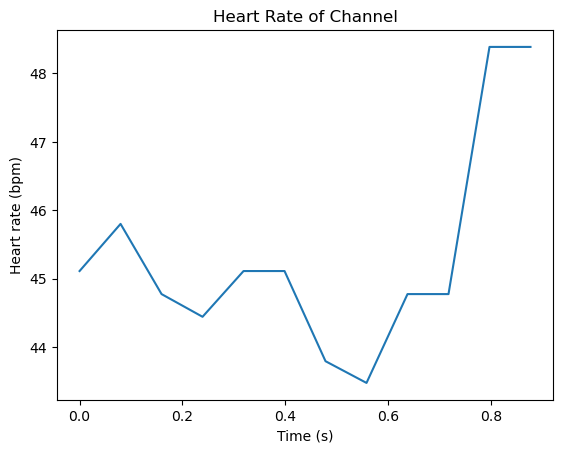

In [86]:

# Calculate heart rate from R-R intervals
rr_intervals = np.diff(peaks)
heart_rate = 60 / (np.mean(rr_intervals) / 100)  # convert to bpm
print(f"Heart rate: {heart_rate:.2f} bpm")

# Plot heart rate
fig = plt.figure()
time_hr = np.linspace(time[0], time[-1]-1/fs, len(rr_intervals))
plt.plot(time_hr, 60/(rr_intervals / 100))
plt.title('Heart Rate of Channel')
plt.xlabel('Time (s)')
plt.ylabel('Heart rate (bpm)')

plt.show()

